# Tensorflow quickstart - recognition of MNIST digits
Based on this tutorial: https://www.tensorflow.org/tutorials/quickstart/beginner

In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.17.0


## Loading the MNIST dataset

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Displaying some digits from the dataset

In [13]:
x_train[0].shape

(28, 28)

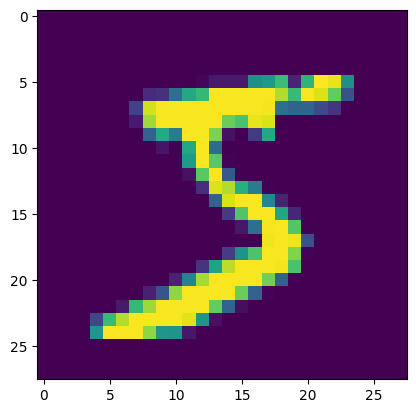

In [14]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])

In [ ]:
# fig, axs = plt.subplots(2, 2)
# axs[0, 0].plot(x, y)
# axs[0, 0].set_title('Axis [0, 0]')
# axs[0, 1].plot(x, y, 'tab:orange')
# axs[0, 1].set_title('Axis [0, 1]')
# axs[1, 0].plot(x, -y, 'tab:green')
# axs[1, 0].set_title('Axis [1, 0]')
# axs[1, 1].plot(x, -y, 'tab:red')
# axs[1, 1].set_title('Axis [1, 1]')

# for ax in axs.flat:
#     ax.set(xlabel='x-label', ylabel='y-label')

# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()


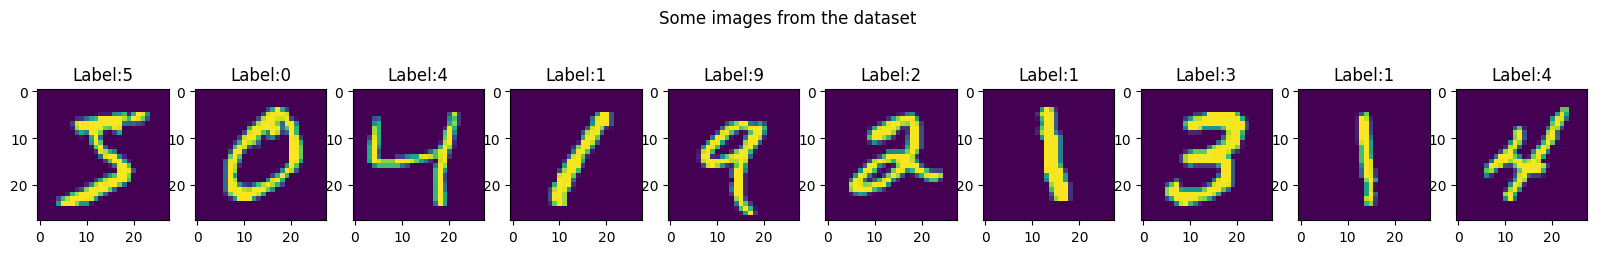

In [32]:
fig, axs = plt.subplots(1, 10, figsize=(20, 3))
fig.suptitle('Some images from the dataset')
for i in range(0, 10):
  axs[i].imshow(x_train[i])
  axs[i].set_title(f"Label:{y_train[i]}")

# axs[0].set(ylabel='y-label')

# for ax in axs.flat:
#   # ax.set(xlabel='x-label', ylabel='y-label')
#   ax.set(ylabel='y-label')

## Building a sequential ML model

In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

## Define the loss function

In [6]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

 ## Compiling the model before training

In [7]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Training the model

In [8]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8617 - loss: 0.4823
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9525 - loss: 0.1552
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9673 - loss: 0.1092
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9739 - loss: 0.0851
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9769 - loss: 0.0756


## Evaluating the model on the test set

In [9]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.9778 - loss: 0.0768


[0.07675796747207642, 0.9778000116348267]

## Returning a probability
If we want the model to return a probability, we can wrap the model, and then attach the softmax layer to it:

In [10]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

and then we have probabilities

In [11]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[4.7380514e-08, 5.8397476e-10, 6.1314684e-05, 6.9342478e-04,
        3.5230981e-11, 1.1555105e-07, 9.9846412e-16, 9.9923766e-01,
        1.0163737e-06, 6.5458485e-06],
       [8.2162493e-10, 1.1870065e-05, 9.9998641e-01, 1.5920928e-06,
        1.6379894e-14, 1.8606394e-07, 2.0302318e-09, 4.5996650e-15,
        1.0419654e-08, 1.5011172e-15],
       [6.4121657e-08, 9.9903643e-01, 2.1703947e-04, 4.5022196e-05,
        3.1360258e-05, 4.5039005e-06, 8.0156369e-06, 5.7486841e-04,
        7.8889461e-05, 3.7940681e-06],
       [9.9780542e-01, 6.9443949e-08, 8.9623407e-04, 1.1166767e-05,
        3.4810968e-05, 1.8307609e-04, 5.9612652e-05, 7.1423048e-05,
        1.3025238e-05, 9.2505850e-04],
       [3.0589996e-07, 1.6150860e-11, 1.3568529e-06, 4.4345082e-08,
        9.9817908e-01, 2.4000497e-07, 5.8330579e-07, 9.5576841e-05,
        1.5188691e-07, 1.7226200e-03]], dtype=float32)>